In [1]:
import pickle
from Posterior import Posterior
from Util import creation_data, plot_confront
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data_creation = False
run_pm = False
run_fb = False
run_em = False
theta_true = 0.05
cfg = {'n_particles': 100, 'theta_eff': 0.5*theta_true, 'sourcespace': None, 'data': None,
       'n_bins': 50, 'sequence_evolution': None, 'method': None, 'verbose': False}
sns.set_style('darkgrid')
verbose = False

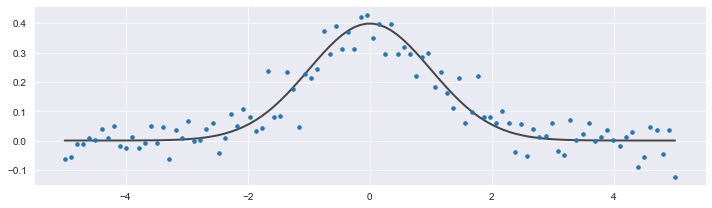

In [3]:
if data_creation:
    cfg['sourcespace'], cfg['data'] = creation_data(n_data=100, theta=theta_true)
    with open('data/data.pkl', 'wb') as f: pickle.dump([cfg['sourcespace'], cfg['data'], theta_true], f)
else:
    with open(f'data/data.pkl', 'rb') as f: cfg['sourcespace'], cfg['data'], theta_true = pickle.load(f)

plt.figure(figsize=(10,3))
plt.plot(cfg['sourcespace'], stats.norm.pdf(cfg['sourcespace'], 0, 1), 'k', linewidth=2, alpha=0.7)
plt.plot(cfg['sourcespace'], cfg['data'], '.', markersize=7)
plt.tight_layout()
#plt.savefig('fig/data_toy.png', dpi=1000)
plt.show()

RUN

In [4]:
if run_pm:
    cfg['method']='PM'
    post_pm = Posterior(cfg=cfg)
    post_pm = post_pm.perform_smc()
    with open(f'sol/sol_pm.pkl', 'wb') as f: pickle.dump(post_pm, f)
else:
    with open(f'sol/sol_pm.pkl', 'rb') as f: post_pm = pickle.load(f)

if run_fb:
    cfg['method']='FB'
    post_fb = Posterior(cfg=cfg)
    post_fb = post_fb.perform_smc()
    with open(f'sol/sol_fb.pkl', 'wb') as f: pickle.dump(post_fb, f)
else:
    with open(f'sol/sol_fb.pkl', 'rb') as f: post_fb = pickle.load(f)

if run_em:
    cfg['method']='EM'
    post_em = Posterior(cfg=cfg)
    post_em = post_em.perform_smc()
    with open(f'sol/sol_em.pkl', 'wb') as f: pickle.dump(post_em, f)
else:
    with open(f'sol/sol_em.pkl', 'rb') as f: post_em = pickle.load(f)

PRINT ESTIMATES

In [5]:
print(f'PM --> Theta -> MAP: {post_pm.map_theta} -- PM: {post_pm.pm_theta} ---- Mean -> MAP: {post_pm.map_mean} -- PM: {post_pm.pm_mean}')
print(f'FB --> Theta -> MAP: {post_fb.map_theta} -- PM: {post_fb.pm_theta} ---- Mean -> MAP: {post_fb.map_mean} -- PM: {post_fb.pm_mean}')
print(f'EM --> Theta -> MAP: {post_em.map_theta} -- PM: {post_em.pm_theta} ---- Mean -> MAP: {post_em.map_mean} -- PM: {post_em.pm_mean}')

PM --> Theta -> MAP: 0.04850338040553235 -- PM: 0.05183328986569056 ---- Mean -> MAP: 0.10000000000000009 -- PM: 4.067558518963545e-79
FB --> Theta -> MAP: 0.04992447011538619 -- PM: 0.052688243731964075 ---- Mean -> MAP: -0.10000000000000009 -- PM: -0.026395265252233163
EM --> Theta -> MAP: 0.05088383838383838 -- PM: 0.050556413369781755 ---- Mean -> MAP: 0.10000000000000009 -- PM: 0.03448210314178551


PLOT PARAMETERS AND CONFRONT

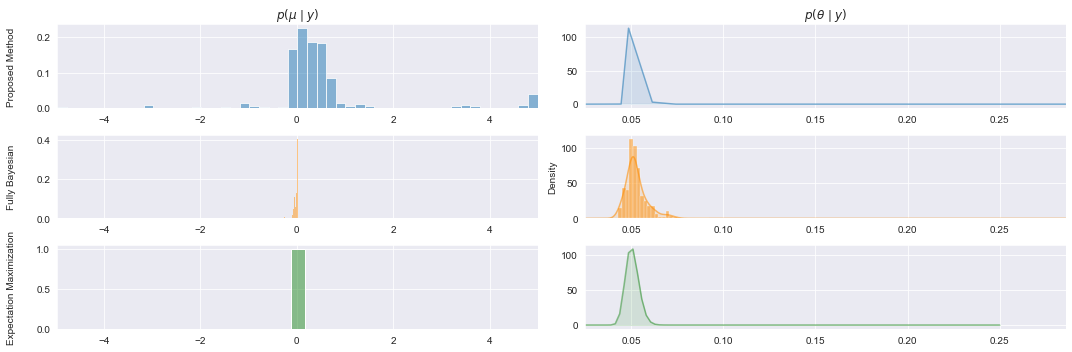

In [6]:
plot_confront(post_pm, post_fb, post_em, savefig=False)